In [3]:
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # 한 실행칸에 프린트 여러개 해도 다 출력시키도록 하는 코드.
import matplotlib.pyplot as plt

In [7]:
def Solution(mu, sigma, r, s0, T, B, num_dt, num_sim):
    
    # Generating stock paths
    dt = T/num_dt
    Initial_log_stock_price = np.log(s0) * np.ones((1, num_sim))
    binomial =  -1 + 2 * np.random.binomial(1, 0.5, (num_dt, num_sim))
    # normal = np.random.randn(num_dt, num_sim)
    dw = binomial * np.sqrt(dt)
    # dw = normal * np.sqrt(dt)
    d_logS = (r-0.5*(sigma**2)) * dt * np.ones((num_dt, num_sim)) + dw * sigma
    tmp = np.concatenate((Initial_log_stock_price, d_logS), axis=0)
    log_stock_price = np.cumsum(tmp, axis = 0)
    stock_price = np.exp(log_stock_price)
    
    #Plotting Stock paths - time cumsuming.. 
#     plt.title("Stock paths")
#     plt.plot(stock_price)
#     plt.show()
    

    # search the hitting point
    hit_idxs = []
    for j in range(len(stock_price[0])):
        for i in range(len(stock_price)):
            if(stock_price[i][j] >= B or i == len(stock_price)-1):
                hit_idxs.append(i)
                break
                
    # pricing
    pv_payoffs = []
    for j in range(len(stock_price[0])):
        t = hit_idxs[j]
        pv_payoff = stock_price[:t+1,j].mean() * np.exp(-r * t * dt)
        pv_payoffs.append(pv_payoff)

    return np.array(pv_payoffs).mean()
    

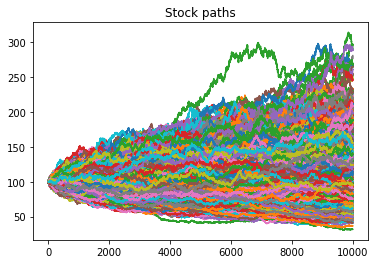

94.06094255262283

In [8]:
Solution(0.05, 0.2, 0.03, 100, 2, 110, 10000, 10000)